# Train a model using fast.ai

Now it is your turn to train a model on this same dataset using fast.ai!

## Setup

### Import necessary libraries

In [69]:
# This file contains all the main external libs we'll use
from fastai.imports import * #used for fastai
from IPython import display #used to display media in notebook
import soundfile as sf #used to load sound files
import matplotlib.pyplot as plt #used to plot in notebook
import scipy
from scipy.signal import hann
from scipy.fftpack import rfft

import pandas as pd
from fastai.data.all import *
from fastai.vision.all import *
import librosa
import os
import torch;
import torchaudio;

### Check if CUDA is available - This will be a problem later if this doesn't work

In [70]:
print(torch.cuda.is_available())

True


### Setup dataset paths

In [71]:
DATA_ROOT_DIR=os.path.normpath(os.path.join(os.getcwd(), 'full_data'))
SAMPLE_DATA_ROOT_DIR=os.path.normpath(os.path.join(os.getcwd(), 'sample_data'))

DATA_WHALE_AUDIO_DIR=os.path.join(DATA_ROOT_DIR, 'whale')
DATA_NOT_WHALE_AUDIO_DIR=os.path.join(DATA_ROOT_DIR, 'not_whale')
path = Path(DATA_ROOT_DIR)

### Create Fast.AI Transformer to Load Audio to Spectrogram

In [89]:
def to_specgram(audio_file, n_fft=256):
    waveform, sample_rate = torchaudio.load(audio_file)
    transform = torchaudio.transforms.Spectrogram(n_fft=n_fft)
    spectrogram = transform(waveform)
    return spectrogram[0]

class SpecgramTransform(Transform):
    def __init__(self): self.aug = to_specgram
    def encodes(self, audio_file: Path):
        aug_img = self.aug(audio_file)

        # standardize
        return PILImage.create(aug_img)

Check one file to see if data loaded correctly

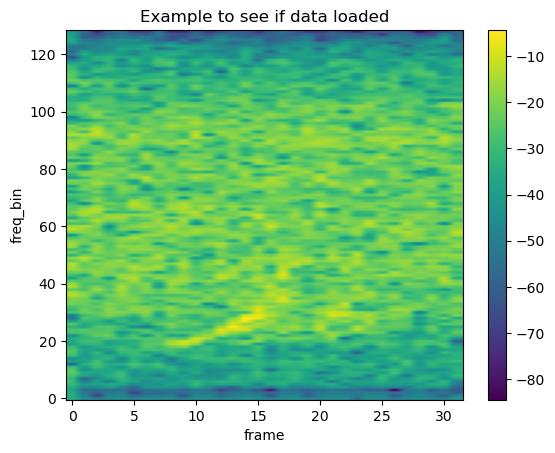

In [90]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

files = get_files(path)
file = files[0]
s = to_specgram(file)
plot_spectrogram(s, title='Example to see if data loaded')

## Model Training

### Load dataset

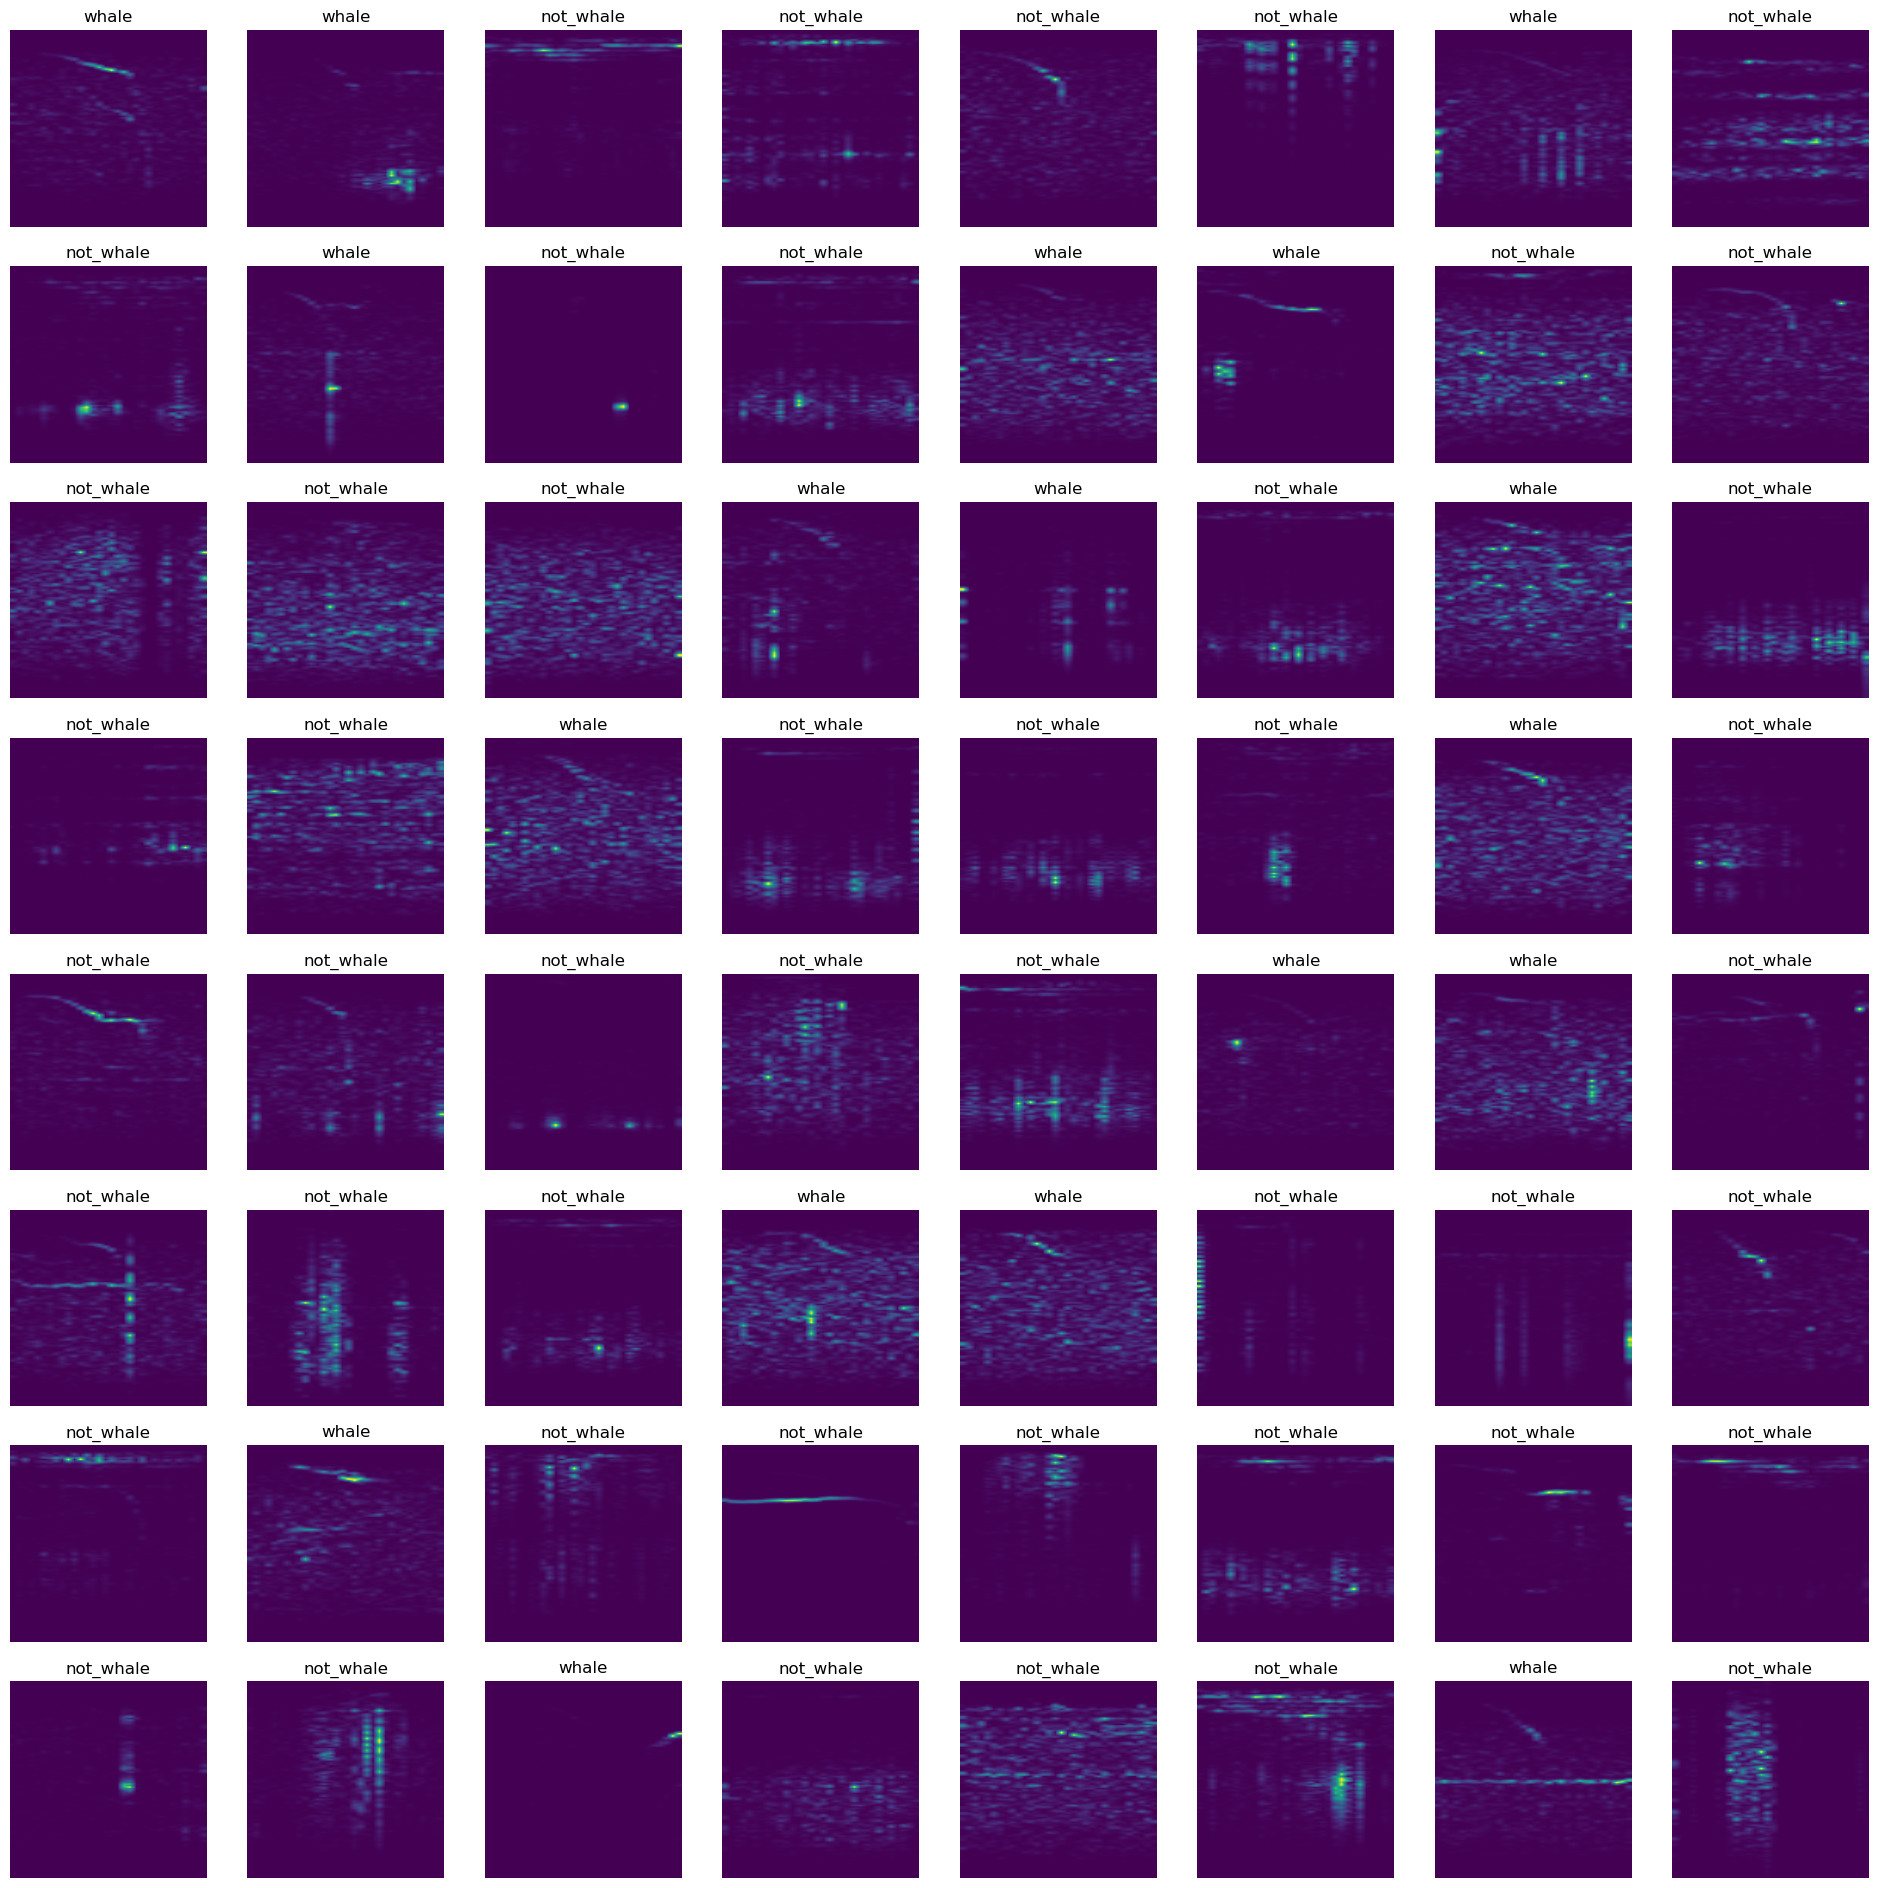

In [96]:
dblock = DataBlock(
    blocks = [TransformBlock, CategoryBlock],
    get_items = get_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = [ SpecgramTransform(), Resize(224, method='squish') ]
)
dls = dblock.dataloaders(path)
dls.show_batch(max_n=64)

### Train

In [94]:
learn = vision_learner(dls, resnet18, metrics=error_rate, pretrained=False)
learn.fit(10)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.423840,0.517883,0.228500,00:31
1,0.353125,0.723546,0.228500,00:28
2,0.318835,1.093322,0.228500,00:29
3,0.275108,1.268966,0.228500,00:32
4,0.308372,1.319121,0.228333,00:31
5,0.261148,0.264552,0.121333,00:29
6,0.257628,1.049408,0.228500,00:30
7,0.232321,1.257620,0.228500,00:31
8,0.245061,0.985223,0.228500,00:30
9,0.228002,0.938494,0.225667,00:30


### Export

In [ ]:
TODO: by you

## Brainstorm ideas for improvement

Don't improve things in this notebook. Save it for the later one. But just jot down some ideas you can think of to improve the results.

* todo by you